# Heatmap_Xinrui Qian

In [23]:
import json
import pandas as pd
import numpy as np


with open("raw_data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

In [24]:
print(json.dumps(data, indent=4, ensure_ascii=False))

{
    "05. Dec (Thursday)": {
        "Metadata": {
            "Veggie": "vegan currywurst with pommes",
            "Day_Menu": "spicy asian sesame noodles",
            "Auswahl": "vegetarian lasagna; potato vegetable pan",
            "Comment": "Cash_T closed from 12:25; issues keeping track of many people moving simultanueously and queue wrapping around itself; sometimes people entering and leaving again (not deleted)",
            "Veggie & Cash": "People queuing when food ran out; people taking too long at cash is major bottleneck; all going to Cash_L"
        },
        "Cash_T": [
            1733396115644,
            1733396120069,
            1733396120718,
            1733396121550,
            1733396124562,
            1733396127058,
            1733396134231,
            1733396150004,
            1733396156794,
            1733396202553,
            1733396235902,
            1733396242988,
            1733396258763,
            1733396260510,
            173339626688

In [ ]:

def cut_data(data, cut_start, cut_end):
    return [timestamp for timestamp in data if timestamp >= cut_start and timestamp <= cut_end]

cut_start = 1734519960000 # 12:06
cut_end = 1734520799000 # 12:19:59
for spot in data["18. Dec (Wednesday)"]:
    if spot == "Metadata":
        continue
    data["18. Dec (Wednesday)"][spot] = cut_data(data["18. Dec (Wednesday)"][spot], cut_start, cut_end)


In [64]:

# Function to categorize timestamps into time intervals
def categorize_timestamps(timestamps, min_time, max_time, interval=2): #interval can be changed here
    """Group timestamps into specific time intervals, truncating them to the common time range."""
    # Convert timestamps to relative time (assuming min_time is the start point)
    relative_times = [(ts - min_time) // (1000 * 60) for ts in timestamps
                       if min_time <= ts <= max_time]  # Convert to minutes and truncate

    max_time_adjusted = max(relative_times) if relative_times else 0
    
    # Create time intervals (bins)
    bins = np.arange(0, max_time_adjusted + interval, interval)
    labels = [f"{int(b)}-{int(b + interval)}" for b in bins[:-1]]

    print(bins)
    # Categorize data into bins using pd.cut()
    binned_data = pd.cut(relative_times, bins, right=False, labels=labels)
    # Count occurrences in each bin
    counts = pd.Series(binned_data).value_counts(sort=False).reindex(labels, fill_value=0)
    return dict(zip(labels, counts.tolist()))


date2 = "18. Dec (Wednesday)"
date1 = "05. Dec (Thursday)"

# Initialize the final result dictionary
final_data = {"Time Intervals": None}

# Loop through all locations and categorize timestamps based on the common time range
for location, timestamps in data[date2].items():
    # Skip non-timestamp data like "Metadata"
    if location == "Metadata" or not isinstance(timestamps, list):
        continue
    
    # Process timestamps and categorize them into intervals, truncating to the common range
    time_segment_data = categorize_timestamps(timestamps, cut_start, cut_end)
    
    # Initialize "Time Intervals" (only set it once)
    if final_data["Time Intervals"] is None:
        final_data["Time Intervals"] = list(time_segment_data.keys())
    
    # Add the counts to the corresponding location
    final_data[location] = list(time_segment_data.values())

# Now, we need to ensure that all arrays (time interval counts) have the same length
# Fill missing values with 0 for locations that have fewer time intervals
max_len = max(len(v) for v in final_data.values() if isinstance(v, list))

for key, value in final_data.items():
    if isinstance(value, list):  # Only handle the lists
        # Pad the list with zeros if it is shorter than the max length
        final_data[key] = value + [0] * (max_len - len(value))
print(final_data)

[ 0  2  4  6  8 10 12 14]
[0 2 4 6 8]
[ 0  2  4  6  8 10 12 14]
[ 0  2  4  6  8 10 12 14]
[ 0  2  4  6  8 10 12 14]
[ 0  2  4  6  8 10 12 14]
[ 0  2  4  6  8 10 12 14]
[ 0  2  4  6  8 10 12 14]
[ 0  2  4  6  8 10 12 14]
[ 0  2  4  6  8 10 12 14]
{'Time Intervals': ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14'], 'Entrance_R': [28, 25, 18, 7, 16, 23, 15], 'Entrance_L': [7, 6, 3, 4, 0, 0, 0], 'Cutlery': [27, 22, 22, 16, 13, 18, 21], 'Auswahl': [0, 5, 5, 6, 4, 0, 3], 'Day_Menu': [10, 16, 14, 9, 15, 7, 8], 'Cash_T': [13, 11, 7, 9, 10, 10, 5], 'Cash_B': [8, 6, 12, 4, 9, 9, 6], 'Veggie': [15, 17, 21, 11, 15, 23, 18], 'Veggie_Cash_R': [11, 9, 12, 9, 6, 10, 13], 'Veggie_Cash_L': [4, 4, 5, 9, 7, 9, 7]}


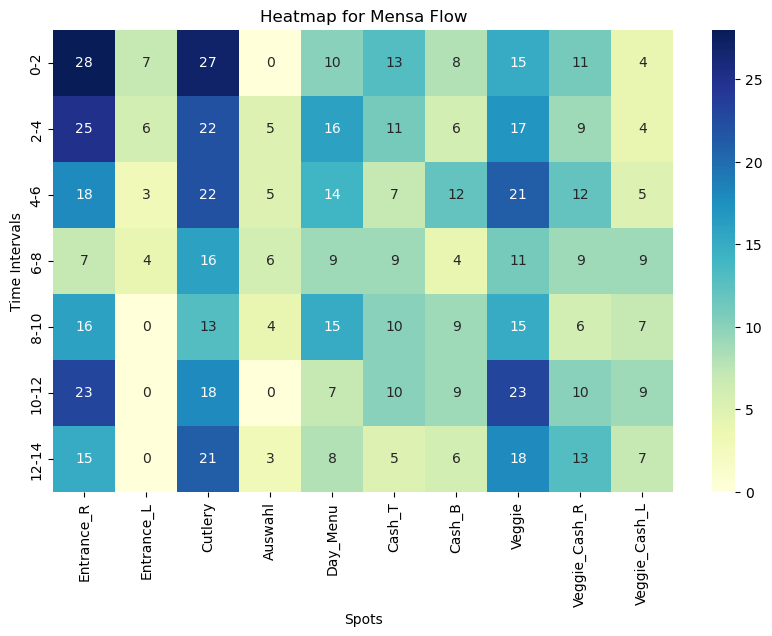

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(final_data)

df.set_index("Time Intervals", inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap for Mensa Flow")
plt.xlabel("Spots")
plt.ylabel("Time Intervals")
plt.show()